In [79]:
import json
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [35]:
df_level = pd.read_json("kWaterLevel.json")
df_level.head()

,timestamp,waterLevel
0,2017-08-19 03:20:00,0.42
1,2017-08-19 12:40:00,0.42
2,2017-08-19 12:50:00,0.42
3,2017-08-19 13:10:00,0.42
4,2017-08-19 13:20:00,0.42


In [36]:
df_level = df_level.set_index('timestamp')
df_level.head()

,waterLevel
timestamp,
2017-08-19 03:20:00,0.42
2017-08-19 12:40:00,0.42
2017-08-19 12:50:00,0.42
2017-08-19 13:10:00,0.42
2017-08-19 13:20:00,0.42


In [39]:
# タイムゾーンを設定(UTCで入ってる)
#df_level.index = pd.to_datetime(df_level.index, utc=True)
df_level.index = df_level.index.tz_localize('UTC')
df_level.index

DatetimeIndex(['2017-08-19 03:20:00+00:00', '2017-08-19 12:40:00+00:00',
               '2017-08-19 12:50:00+00:00', '2017-08-19 13:10:00+00:00',
               '2017-08-19 13:20:00+00:00', '2017-08-19 13:30:00+00:00',
               '2017-08-19 13:40:00+00:00', '2017-08-19 13:50:00+00:00',
               '2017-08-19 14:10:00+00:00', '2017-08-19 14:20:00+00:00',
               ...
               '2017-09-24 16:50:00+00:00', '2017-09-24 17:10:00+00:00',
               '2017-09-24 17:20:00+00:00', '2017-09-24 17:30:00+00:00',
               '2017-09-24 17:40:00+00:00', '2017-09-24 17:50:00+00:00',
               '2017-09-24 18:00:00+00:00', '2017-09-24 18:10:00+00:00',
               '2017-09-24 18:20:00+00:00', '2017-09-24 18:30:00+00:00'],
              dtype='datetime64[ns, UTC]', name='timestamp', length=4524, freq=None)

In [40]:
# JSTに変換
df_level.index = df_level.index.tz_convert('Asia/Tokyo')
df_level.index

DatetimeIndex(['2017-08-19 12:20:00+09:00', '2017-08-19 21:40:00+09:00',
               '2017-08-19 21:50:00+09:00', '2017-08-19 22:10:00+09:00',
               '2017-08-19 22:20:00+09:00', '2017-08-19 22:30:00+09:00',
               '2017-08-19 22:40:00+09:00', '2017-08-19 22:50:00+09:00',
               '2017-08-19 23:10:00+09:00', '2017-08-19 23:20:00+09:00',
               ...
               '2017-09-25 01:50:00+09:00', '2017-09-25 02:10:00+09:00',
               '2017-09-25 02:20:00+09:00', '2017-09-25 02:30:00+09:00',
               '2017-09-25 02:40:00+09:00', '2017-09-25 02:50:00+09:00',
               '2017-09-25 03:00:00+09:00', '2017-09-25 03:10:00+09:00',
               '2017-09-25 03:20:00+09:00', '2017-09-25 03:30:00+09:00'],
              dtype='datetime64[ns, Asia/Tokyo]', name='timestamp', length=4524, freq=None)

In [42]:
# 分析の邪魔なのでタイムゾーン削除
df_level.index = df_level.index.tz_localize(None)
df_level.head()

,waterLevel
timestamp,
2017-08-19 12:20:00,0.42
2017-08-19 21:40:00,0.42
2017-08-19 21:50:00,0.42
2017-08-19 22:10:00,0.42
2017-08-19 22:20:00,0.42


In [49]:
# waterLevelがハイフンの場合を取得
df_level.loc[df_level['waterLevel'] == '-']

,waterLevel
timestamp,
2017-09-24 18:40:00,-
2017-09-24 18:50:00,-


In [85]:
# 以下2つの例外を正規表現などで取得できるようにする
# &&nbsp;1.10
# &&nbsp;1.41
df_level.loc[df_level['waterLevel'] == '&&nbsp;1.10'].head()

,waterLevel
timestamp,
2017-08-25 17:20:00,&&nbsp;1.10


In [102]:
#  型変換 object -> float
df_level_ser = df_level.loc[
   (df_level['waterLevel'] != '-') 
    & (df_level['waterLevel'] != '&&nbsp;1.10')
    & (df_level['waterLevel'] != '&&nbsp;1.41')]
df_level_ser["waterLevel"].dtype

dtype('O')

In [110]:
# float型へ変換
df_level_ser["waterLevel"] = df_level_ser["waterLevel"].astype(np.float64)
df_level_ser["waterLevel"].dtype

/Users/runble1/.pyenv/versions/3.6.1/envs/lambda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


dtype('float64')

In [111]:
df_level_ser['waterLevel'].mean()

0.31673893805309739

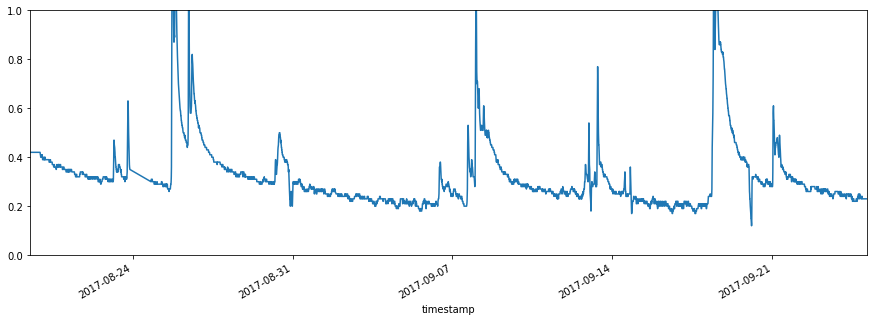

In [113]:
df_level_ser["waterLevel"].plot(figsize=(15,5), ylim=(0,1))

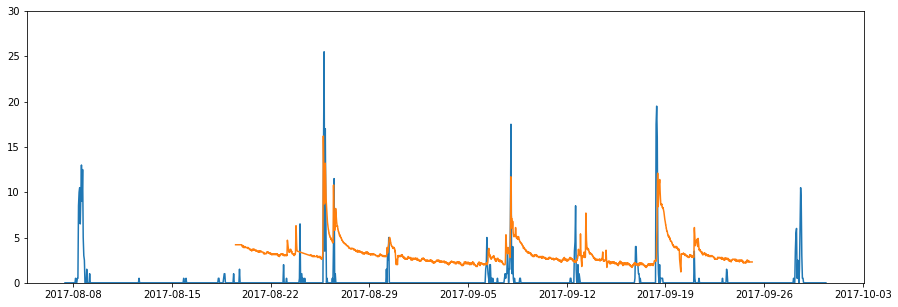

In [117]:
filename = "data.csv"
df = pd.read_csv(filename,encoding="SHIFT-JIS",skiprows=4)
df_rain = df.iloc[:,0:2]
df_rain.columns = ["timestamp", "rain"]
df_rain["timestamp"] = df_rain.timestamp.map(lambda _: pd.to_datetime(_))
df_rain = df_rain.set_index('timestamp')
df_rain.index = df_rain.index.tz_localize('UTC')
df_rain.index = df_rain.index.tz_convert('Asia/Tokyo')
df_rain.index = df_rain.index.tz_localize(None)
plt.figure(figsize=(15,5))
plt.ylim(0,30)
plt.plot(df_rain.rain)
plt.plot(df_level_ser["waterLevel"] * 10)